In [40]:
# compare all color usage
import pandas as pd
import numpy as np
from skimage.color import rgb2hsv, rgb2lab

path = "../../../frontend/public/all.csv"
all = pd.read_csv(path)
# print(all.keys())

# group by style
grouped = all.groupby('style')

# add hue saturation lightness
all['h'] = 0
all['s'] = 0
all['v'] = 0
all["L"] = 0
all["A"] = 0
all["B"] = 0

# group by concept

for index, row in all.iterrows():
    dominant = row['color_dominant']
    dominant = dominant[1:-1].split(",")
    r = int(dominant[0])
    g = int(dominant)
    b = int(dominant[2])
    h, s, v = rgb2hsv(np.array([r / 255, g / 255, b / 255]).reshape(1, 1, 3))[0, 0, :]
    l, a, b = rgb2lab(np.array([r / 255, g / 255, b / 255]).reshape(1, 1, 3))[0, 0, :]
    all.loc[index, 'h'] = h
    all.loc[index, 's'] = s
    all.loc[index, 'v'] = v
    all.loc[index, 'L'] = l
    all.loc[index, 'A'] = a
    all.loc[index, 'B'] = b

# box plot for each style
import seaborn as sns
import matplotlib.pyplot as plt
# three subplots
plt.figure(figsize=(20, 5))
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
# padding between subplots
plt.subplots_adjust(wspace=0.5)
# bar width = 0.8

# sns.boxplot(x='style', y='h', data=all, ax=axs[0], hue = 'style', width=0.5)
# sns.boxplot(x='style', y='s', data=all, ax=axs[1], hue = 'style', width=0.5)
# sns.boxplot(x='style', y='v', data=all, ax=axs[2], hue = 'style', width=0.5)
# sns.boxplot(x='style', y='L', data=all, ax=axs[3], hue = 'style', width=0.5)
# sns.boxplot(x='style', y='A', data=all, ax=axs[4], hue = 'style', width=0.5)
# sns.boxplot(x='style', y='B', data=all, ax=axs[5], hue = 'style', width=0.5)

# violin plot
sns.violinplot(x='style', y='h', data=all, ax=axs[0], hue='style', width=0.8)
sns.violinplot(x='style', y='s', data=all, ax=axs[1], hue='style', width=0.8)
sns.violinplot(x='style', y='v', data=all, ax=axs[2], hue='style', width=0.8)
sns.violinplot(x='style', y='L', data=all, ax=axs[3], hue='style', width=0.8)
sns.violinplot(x='style', y='A', data=all, ax=axs[4], hue='style', width=0.8)
sns.violinplot(x='style', y='B', data=all, ax=axs[5], hue='style', width=0.8)

# significance test
# anova test for three groups
from scipy.stats import f_oneway

# test for h, s, v, L, A, B, group by style (clipart, photo)
clipart = all[all['style'] == 'clipart']
photo = all[all['style'] == 'photo']
design = all[all['style'] == 'design']

# 三组数据的h, s, v, L, A, B的方差齐性检验
print("h:", f_oneway(clipart['h'], photo['h'], design['h']))
print("s:", f_oneway(clipart['s'], photo['s'], design['s']))  # have significant difference <.001
print("v:", f_oneway(clipart['v'], photo['v'], design['v']))
print("L:", f_oneway(clipart['L'], photo['L'], design['L']))
print("A:", f_oneway(clipart['A'], photo['A'], design['A']))
print("B:", f_oneway(clipart['B'], photo['B'], design['B']))

# 比较design和photo的h, s, v, L, A, B
# t-test
print("clipart")
from scipy.stats import ttest_ind

print("h:", ttest_ind(design['h'], clipart['h']))
print("s:", ttest_ind(design['s'], clipart['s']))
print("v:", ttest_ind(design['v'], clipart['v']))
print("L:", ttest_ind(design['L'], clipart['L']))
print("A:", ttest_ind(design['A'], clipart['A']))
print("B:", ttest_ind(design['B'], clipart['B']))

print('photo')

print("h:", ttest_ind(design['h'], photo['h']))
print("s:", ttest_ind(design['s'], photo['s']))
print("v:", ttest_ind(design['v'], photo['v']))
print("L:", ttest_ind(design['L'], photo['L']))
print("A:", ttest_ind(design['A'], photo['A']))
print("B:", ttest_ind(design['B'], photo['B']))


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

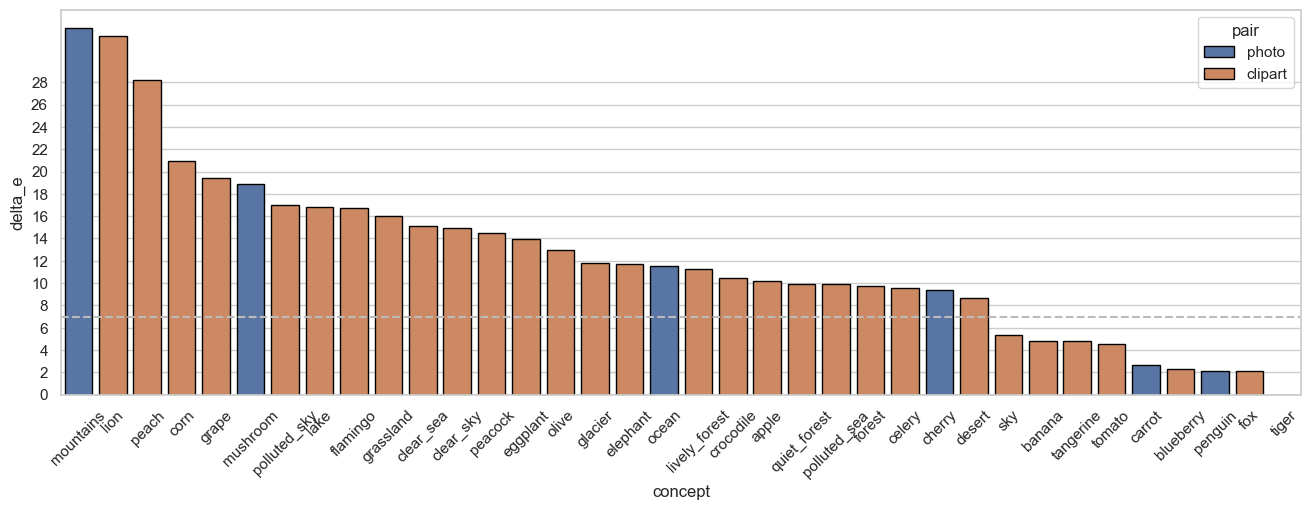

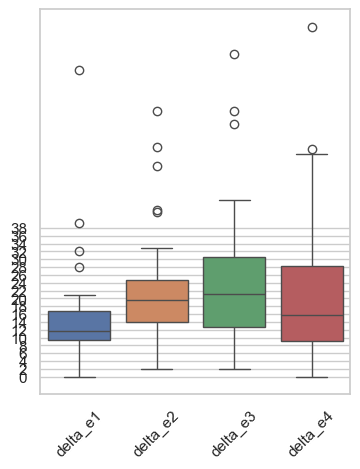

FriedmanchisquareResult(statistic=20.489736070381202, pvalue=0.00013435190097992725)
WilcoxonResult(statistic=208.0, pvalue=0.079676136848059)


In [216]:
import pandas as pd
import numpy as np
from pyciede2000 import ciede2000
from skimage.color import rgb2lab

# Load CSV file
path = "../../../frontend/public/user_study.csv"
all_data = pd.read_csv(path)

# sky
# ocean
# desert
# grassland
# forest
# lake
# glacier
# quiet forest
# lively forest
# clear sky
# polluted sky
# clear sea
# polluted sea
# Convert color strings to numpy arrays
# concepts = [ 'quiet_forest', 'lively_forest', 'clear_sky', 'polluted_sky', 'clear_sea', 'polluted_sea']
def parse_color_string(color_str):
    return np.array(eval(color_str))


# RGB to Lab conversion using skimage
def rgb_to_lab(color_rgb):
    normalized_rgb = color_rgb / 255.0  # Normalize RGB values to [0, 1]
    lab_color = rgb2lab(normalized_rgb.reshape(1, 1, 3)).reshape(3)  # Convert to Lab and reshape to 1D array
    return lab_color


# Group by 'concept'
grouped = all_data.groupby('concept')

# filter concept in concepts
# grouped = [(concept, group) for concept, group in grouped if concept in concepts]
color_differences = []
all_color_diff = []

for concept, group in grouped:
    # Get the color_dominant column and parse it to an array
    dominant_color = [parse_color_string(color) for color in group['color_dominant']][0]
    # filter clipart
    dominant_cliaprt = group[group['style'] == 'clipart']
    dominant_photo = group[group['style'] == 'photo']
    dominant_design = group[group['style'] == 'design']
    dominant_query = group[group['style'] == 'query']
    dominant_queryclipart = group[group['style'] == 'queryclipart']
    dominant_clipart_lab = [rgb_to_lab(parse_color_string(color)) for color in dominant_cliaprt['color_dominant']]
    dominant_photo_lab = [rgb_to_lab(parse_color_string(color)) for color in dominant_photo['color_dominant']]
    dominant_design_lab = [rgb_to_lab(parse_color_string(color)) for color in dominant_design['color_dominant']]
    dominant_query_lab = [rgb_to_lab(parse_color_string(color)) for color in dominant_query['color_dominant']]
    dominant_queryclipart_lab = [rgb_to_lab(parse_color_string(color)) for color in dominant_queryclipart['color_dominant']]
    if len(dominant_clipart_lab) == 0 or len(dominant_photo_lab) == 0 or len(dominant_design_lab) == 0:
        print(f"Skipping concept {concept} due to missing data")
        continue

    delta_e1 = ciede2000(dominant_clipart_lab[0], dominant_design_lab[0])['delta_E_00']
    delta_e2 = ciede2000(dominant_photo_lab[0], dominant_design_lab[0])['delta_E_00']
    delta_e3 = ciede2000(dominant_query_lab[0], dominant_design_lab[0])['delta_E_00']
    delta_e4 = ciede2000(dominant_queryclipart_lab[0], dominant_design_lab[0])['delta_E_00']
    all_color_diff.append({'concept': concept, 'delta_e1': delta_e1, 'delta_e2': delta_e2, 'delta_e3': delta_e3, 'delta_e4': delta_e4})
    min_delta_e = min(delta_e1, delta_e2)
    if min_delta_e == delta_e1:
        color_differences.append({'concept': concept, 'delta_e': delta_e1, "pair": "clipart"})
    elif min_delta_e == delta_e2:
        color_differences.append({'concept': concept, 'delta_e': delta_e2, "pair": "photo"})

    # elif min_delta_e == delta_e3:
    #     color_differences.append({'concept': concept, 'delta_e': delta_e3, "pair": "query"})
    # else:
    #     color_differences.append({'concept': concept, 'delta_e': delta_e4, "pair": "queryclipart"})

# Convert differences to DataFrame for easy analysis
color_diff_df = pd.DataFrame(color_differences)

# rank the color differences
color_diff_df = color_diff_df.sort_values(by='delta_e', ascending=False)

# list of ranked prompt

# bar plot for each concept
import seaborn as sns
import matplotlib.pyplot as plt
# add line at y=7

plt.figure(figsize=(16, 5))
# border radius 10 for the bar
sns.barplot(x='concept', y='delta_e', data=color_diff_df, ci=None, hue='pair', dodge=False, edgecolor='black', linewidth=1)
# plt.axhline(y=11, color='#bbb', linestyle='--')
plt.axhline(y=7, color='#bbb', linestyle='--')
# plt.axhline(y=3, color='#bbb', linestyle='--')
# y ticks
plt.yticks(np.arange(0, 30, 2))
plt.xticks(rotation=45)

save_path = "../../../frontend/public/color_diff.svg"
plt.savefig(save_path, bbox_inches='tight')

# all_color_diff box plot
all_color_diff_df = pd.DataFrame(all_color_diff)
plt.figure(figsize=(4, 5))
# x label: clipart, photo, query, queryclipart
labels = ['clipart', 'photo', 'query', 'queryclipart']
sns.boxplot(data=all_color_diff_df, width=0.8)
# x label
# plt.xticks(np.arange(4), labels)


plt.xticks(rotation=45)
# y max 40
plt.yticks(np.arange(0, 40, 2))
plt.show()

# get statistics fridman test
from scipy.stats import friedmanchisquare

print(friedmanchisquare(all_color_diff_df['delta_e1'], all_color_diff_df['delta_e2'], all_color_diff_df['delta_e3'], all_color_diff_df['delta_e4']))

# post hoc test
from scipy.stats import wilcoxon

# print(wilcoxon(all_color_diff_df['delta_e1'], all_color_diff_df['delta_e2']))
# print(wilcoxon(all_color_diff_df['delta_e1'], all_color_diff_df['delta_e3']))
# print(wilcoxon(all_color_diff_df['delta_e2'], all_color_diff_df['delta_e3']))
print(wilcoxon(all_color_diff_df['delta_e1'], all_color_diff_df['delta_e4']))   


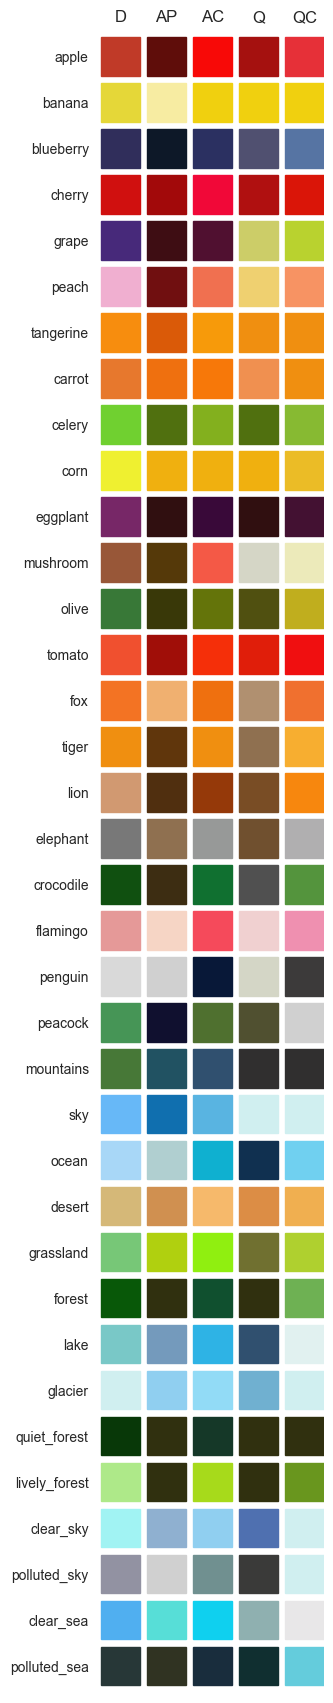

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import ast


# 将字符串转换为RGB格式
def convert_to_rgb(color_str):
    color_tuple = ast.literal_eval(color_str)
    return tuple([c / 255.0 for c in color_tuple])


# 加载CSV文件
file_path = "/Users/sunnary/Github/semantic-color-code/frontend/public/user_study.csv"
df = pd.read_csv(file_path)

# 风格到列的映射
style_to_column = {'design': 'D', 'photo': 'AP', 'clipart': 'AC', 'query': 'Q', 'queryclipart': 'QC'}

# 固定色块大小，自动调整图片尺寸
rect_size = 1  # 色块大小固定
spacing = 0.2  # 色块之间的水平间隔
vertical_spacing = 0.2  # 色块上下的额外间隔
concept_count = len(df['concept'].unique())
# apple
# banana
# blueberry
# cherry
# grape
# peach
# tangerine
# carrot
# celery
# corn
# eggplant
# mushroom
# olive
# tomato
# fox
# tiger
# lion
# elephant
# crocodile
# flamingo
# penguin
# peacock
# mountains
# sky
# ocean
# desert
# grassland
# forest
# lake
# glacier
# quiet forest
# lively forest
# clear sky
# polluted sky
# clear sea
# polluted sea
sequence = ['apple', 'banana', 'blueberry', 'cherry', 'grape', 'peach', 'tangerine', 'carrot', 'celery', 'corn', 'eggplant', 'mushroom', 'olive', 'tomato', 'fox', 'tiger', 'lion', 'elephant', 'crocodile', 'flamingo', 'penguin', 'peacock', 'mountains', 'sky', 'ocean', 'desert', 'grassland', 'forest', 'lake', 'glacier', 'quiet_forest', 'lively_forest', 'clear_sky', 'polluted_sky', 'clear_sea', 'polluted_sea']
# 不限制图片高度，Matplotlib 会自动调整
fig, ax = plt.subplots(figsize=(8, concept_count * (rect_size + vertical_spacing) / 2))

# 设置网格布局
rows = df['concept'].unique()

rows = sequence
# reverse the order
rows = rows[::-1]
columns = ['D', 'AP', 'AC', 'Q', 'QC']

# 绘制彩色方块
for i, concept in enumerate(rows):
    for j, style in enumerate(columns):
        color_value = df[(df['concept'] == concept) & (df['style'] == list(style_to_column.keys())[j])]['color_dominant'].values
        if color_value:
            rgb_color = convert_to_rgb(color_value[0])
            x_position = j * (rect_size + spacing)  # 水平方向的位置
            y_position = i * (rect_size + vertical_spacing)  # 垂直方向的位置（从上往下绘制）
            ax.add_patch(mpatches.Rectangle((x_position, y_position), rect_size, rect_size, color=rgb_color))

# 设置轴的限制
ax.set_xlim(-spacing, len(columns) * (rect_size + spacing) - spacing)
ax.set_ylim(-vertical_spacing, concept_count * (rect_size + vertical_spacing))
ax.set_aspect('equal')  # 保持方块为正方形

# 设置刻度和标签
ax.set_xticks([rect_size / 2 + i * (rect_size + spacing) for i in range(len(columns))])
ax.set_xticklabels(columns, fontsize=12)
ax.set_yticks([rect_size / 2 + i * (rect_size + vertical_spacing) for i in range(concept_count)])
ax.set_yticklabels(rows, fontsize=10, ha='right')

# 移除刻度线
ax.tick_params(axis='both', which='both', length=0)

# 移动D AP AC标签到图形上方
ax.xaxis.tick_top()

# 隐藏网格线和轴线
ax.grid(False)
ax.spines[:].set_visible(False)

# 保存为SVG格式
output_file = r'/Users/sunnary/Github/semantic-color-code/frontend/public/output_R.svg'
plt.savefig(output_file, format='svg')

# 显示绘图
plt.show()

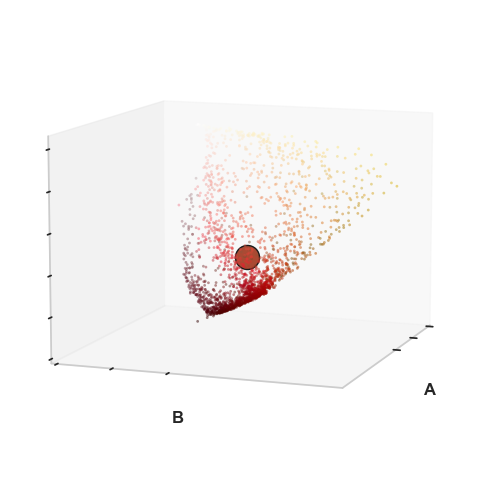

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2lab, lab2rgb
from sklearn.cluster import KMeans
import seaborn as sns

# 设置seaborn风格
sns.set(style='whitegrid')

# 加载图像
names = ["6_4.2_920344786_mask_apple", "12_4.18_967767483_mask_apple"]
# names = ["2_4.45_799239106_mask_apple"]

all_data = None
for name in names:
    image_path = "../../output-segmented/base_photo/apple/" + name + ".png"
    image = io.imread(image_path)

    # 保留 RGB 通道
    image = image[:, :, :3]

    # 缩小图像尺寸以加快处理速度
    image = image[::20, ::20]
    # 将图像转换为 LAB 色彩空间
    rgb = image.reshape(-1, 3)
    lab = rgb2lab(rgb / 255)

    # 过滤掉明度低于 5 的像素
    lab = lab[lab[:, 0] > 5]
    all_data = lab if all_data is None else np.concatenate((all_data, lab))

# 聚类像素强度
n_colors = 1
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(all_data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 将聚类中心转换为 RGB
color_palette = [lab2rgb([[center]])[0, 0, :] for center in centers]
rgb_result = lab2rgb(all_data) * 255

# 创建 3D 图
fig = plt.figure(figsize=(6, 6))  # 设置图像大小
ax = fig.add_subplot(111, projection='3d')

# 去掉网格线
ax.grid(False)

# 设置视角
ax.view_init(elev=10, azim=20)

# 绘制像素点
ax.scatter(all_data[:, 1], all_data[:, 2], all_data[:, 0], c=[rgb_result[i] / 255 for i in range(len(rgb_result))], s=4, alpha=0.5, edgecolors='none', zorder=2)

# 绘制聚类中心
ax.scatter(centers[:, 1], centers[:, 2], centers[:, 0], c=color_palette, s=300, alpha=1, edgecolors='k', linewidth=1, zorder=1)

# 设置轴标签
ax.set_xlabel('A', fontsize=12, fontweight='bold')
ax.set_ylabel('B', fontsize=12, fontweight='bold')
ax.set_zlabel('L', fontsize=12, fontweight='bold')

# 设置刻度
ax.set_xticks(np.arange(-20, 21, 20))
ax.set_yticks(np.arange(-20, 21, 20))
ax.set_zticks(np.arange(0, 101, 20))

# hide ticks
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# 设置标题
# plt.title('Cluster Centers in LAB Color Space', fontsize=14, fontweight='bold')

# 保存图像为SVG文件
path = "../../output-segmented/base_photo/apple-green.svg"
plt.savefig(path, format='svg', bbox_inches='tight')  # 使用bbox_inches确保所有内容都在保存的图像中

# 显示图像
plt.show()


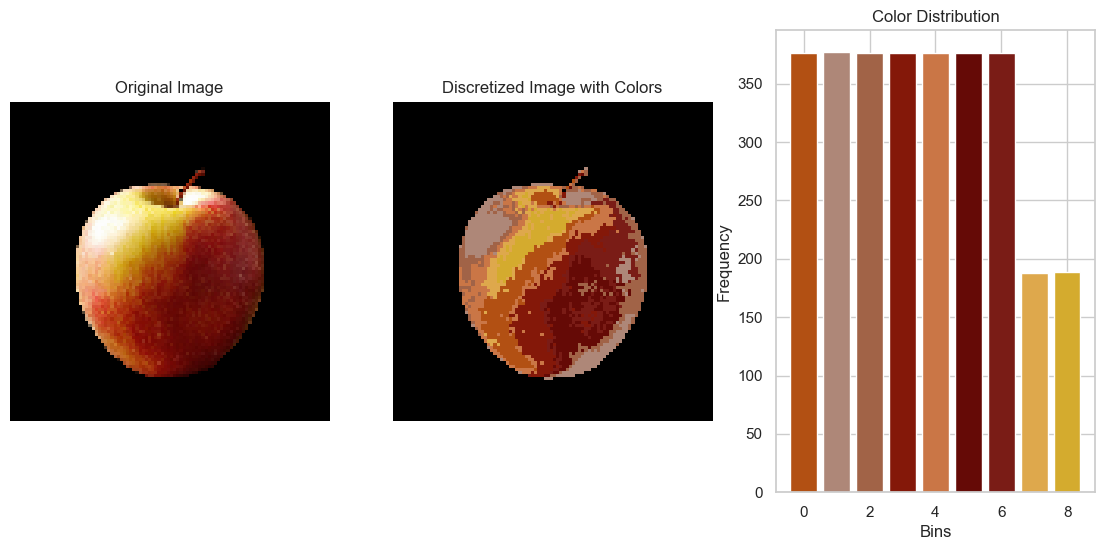

In [ ]:
from pyciede2000 import ciede2000
import numpy as np
import cv2
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb

def downsample_image(image, scale=0.1):
    """对图像进行下采样以减少计算量"""
    height, width = image.shape[:2]
    return cv2.resize(image, (int(width * scale), int(height * scale)))

def calculate_ciede2000_distance_matrix(colors):
    """使用 CIEDE2000 计算颜色间的距离矩阵"""
    n_colors = colors.shape[0]
    distance_matrix = np.zeros((n_colors, n_colors))
    for i in range(n_colors):
        for j in range(i + 1, n_colors):
            distance_matrix[i, j] = ciede2000(colors[i], colors[j])['delta_E_00']
            distance_matrix[j, i] = distance_matrix[i, j]
    return distance_matrix

def supervised_color_discretization(image_lab, max_leaf_nodes=10):
    """使用颜色间距进行有监督的颜色离散化"""
    pixel_values = image_lab.reshape(-1, 3)

    # 使用 CIEDE2000 计算颜色距离矩阵
    color_distances = calculate_ciede2000_distance_matrix(pixel_values)

    # 将距离矩阵的值映射为标签
    labels = np.argmin(color_distances, axis=1)

    # 使用距离矩阵标签训练决策树
    clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=max_leaf_nodes, random_state=0)
    clf.fit(pixel_values, labels)

    # 离散化后的颜色标签
    discretized_labels = clf.apply(pixel_values).reshape(image_lab.shape[:2])

    return discretized_labels, clf

def visualize_discretization(original_image, discretized_labels, clf, image_lab):
    """可视化离散化结果，使用离散后的颜色并绘制条形图"""
    # 获取每个叶节点的中心颜色（通过决策树的预测）
    leaf_ids = np.unique(discretized_labels)
    leaf_colors = []
    counts = []

    for leaf_id in leaf_ids:
        # 找出每个叶节点对应的像素
        mask = (discretized_labels == leaf_id)
        # 计算这些像素的平均LAB颜色
        mean_lab_color = image_lab.reshape(-1, 3)[mask.flatten()].mean(axis=0)
        # 转换为RGB颜色
        mean_rgb_color = (lab2rgb(mean_lab_color.reshape(1, 1, 3)).flatten() * 255).astype(np.uint8)
        leaf_colors.append(mean_rgb_color)
        counts.append(mask.sum())

    # 创建离散化后的图像
    discretized_image_rgb = np.zeros_like(original_image)

    for leaf_id, color in zip(leaf_ids, leaf_colors):
        discretized_image_rgb[discretized_labels == leaf_id] = color

    # 显示原始图像和离散化后的图像
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title(f'Discretized Image with Colors')
    plt.imshow(discretized_image_rgb)
    plt.axis('off')

    filtered_color = []
    filtered_count = []
    for i, color in enumerate(leaf_colors):
        # 如果颜色不是纯黑色
        if not (color[0] == 0 and color[1] == 0 and color[2] == 0):
            filtered_color.append(color)
            filtered_count.append(counts[i])

    # 绘制条形图
    plt.subplot(1, 3, 3)
    plt.title("Color Distribution")
    for i, color in enumerate(filtered_color):
        plt.bar(i, filtered_count[i], color=color / 255.0)
    plt.xlabel("Bins")
    plt.ylabel("Frequency")
    plt.show()

def main(image_path):
    # 读取图像并转换为 LAB 颜色空间
    original_image = cv2.imread(image_path)
    downsampled_image = downsample_image(original_image, scale=0.1)  # 对图像进行下采样
    image_lab = rgb2lab(cv2.cvtColor(downsampled_image, cv2.COLOR_BGR2RGB))

    # 使用 CIEDE2000 颜色差异进行有监督的颜色离散化
    max_leaf_nodes = 10
    discretized_labels, clf = supervised_color_discretization(image_lab, max_leaf_nodes)

    # 可视化结果，使用离散后的颜色并绘制条形图
    visualize_discretization(downsampled_image, discretized_labels, clf, image_lab)

# if __name__ == "__main__":
#     image_path = "../../output-segmented/base_photo/apple/11_4.18_967767483_mask_apple.png"  # 替换为你的图像路径
#     main(image_path)


if __name__ == "__main__":
    image_path = "../../output-segmented/base_photo/apple/11_4.18_967767483_mask_apple.png"  # 替换为你的图像路径
    main(image_path)


1331.3666666666666
(30, 298)
女    21
男     9
Name: 1、您的性别是, dtype: int64
27.066666666666666 6.902939570403588
是    18
否    12
Name: 3、您是否拥有设计相关的背景（拥有设计相关的学位，或者是设计领域从业者）, dtype: int64


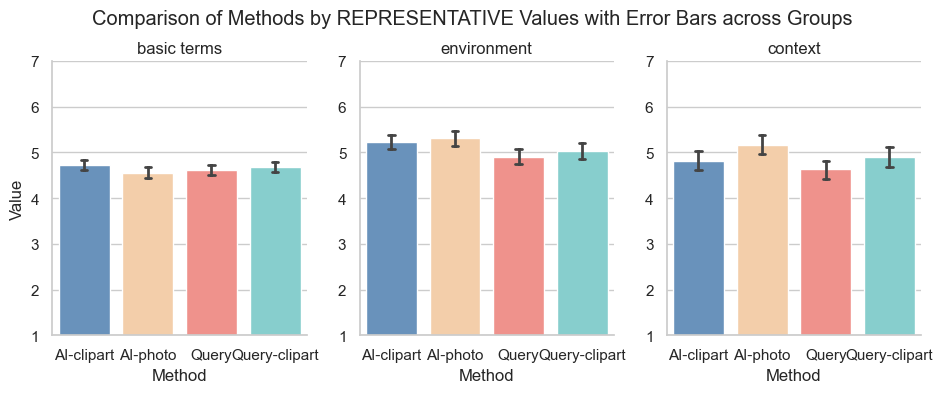

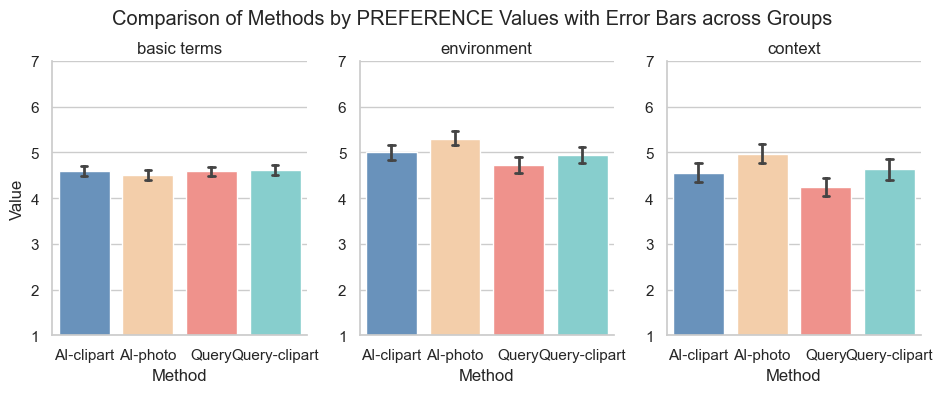


Representative:

############Group: basic terms ############
############ Mean ############
Method
AI-clipart       4.719697
AI-photo         4.550000
Query            4.610606
Query-clipart    4.677273
Name: Value, dtype: float64
############ Std ############
Method
AI-clipart       1.463332
AI-photo         1.467581
Query            1.374450
Query-clipart    1.413279
Name: Value, dtype: float64

############Group: environment ############
############ Mean ############
Method
AI-clipart       5.225000
AI-photo         5.308333
Query            4.904167
Query-clipart    5.020833
Name: Value, dtype: float64
############ Std ############
Method
AI-clipart       1.233850
AI-photo         1.256254
Query            1.272161
Query-clipart    1.412579
Name: Value, dtype: float64
ANOVA: F_onewayResult(statistic=4.8991398664707155, pvalue=0.00219944989771528)
AI-clipart vs Query p-value: 0.005 ** statistic 2.804571495001071
AI-photo vs Query p-value: 0.001 *** statistic 3.5020658344281568
AI-

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import f_oneway, ttest_ind

# 忽略所有警告
warnings.filterwarnings('ignore')

# 读取 Excel 文件
data = pd.read_excel('./rating.xlsx')

# 提取数值部分并转换为整数
data.iloc[:, 2] = data.iloc[:, 2].str.extract('(\d+)').astype(int)

# distribution of time :2
# print(data.iloc[:, 2].value_counts())
# histogram of time
# plt.hist(data.iloc[:, 2], bins=40)
# plt.show()
# 移除不符合条件的行
data = data[~data['序号'].isin([11, 13, 14, 19, 28, 40, 43, 45, 49, 50, 56, 59, 60])]
data = data[(data.iloc[:, 9] != '否') | (data.iloc[:, 2] >= 500)]
data = data[(data.iloc[:, 9] != '否') | (data.iloc[:, 2] <= 3000)]

#  mean data.iloc[:, 2]
print(data.iloc[:, 2].mean())

# 筛选设计师
# data = data[(data.iloc[:, 9] != '否')]
# 筛选非设计师
# data = data[(data.iloc[:, 9] != '是')]
print(data.shape)
# 统计有效的用户id
# print(data['序号'])
# 保留所需列
data = data.iloc[:, 7:]

# 提取性别、年龄和背景信息
gender = data.iloc[:, 0]
age = data.iloc[:, 1]
background = data.iloc[:, 2]
print(gender.value_counts())
# 计算年龄的平均值，标准差
print(age.mean(), age.std())
print(background.value_counts())

# 提取后面的数据
method_columns = ['AI-clipart', 'AI-photo', 'Query', 'Query-clipart']
metric_columns = ['Representative', 'Preference']
group_names = ['basic terms', 'environment', 'context']

# 准备数据框以存储重塑后的数据
reshaped_data = {'Method': [], 'Metric': [], 'Group': [], 'Value': []}

# 根据列索引的余数来判断列属于哪个方法和指标
for i in range(3, data.shape[1]):
    method_index = (i - 3) % 8 // 2
    metric_index = (i - 3) % 2
    cycle = (i - 3) // 8
    # 7,7,8,8,6
    if cycle < 22:
        group = group_names[0]
    elif cycle < 30:
        group = group_names[1]
    else:
        group = group_names[2]

    method = method_columns[method_index]
    metric = metric_columns[metric_index]

    reshaped_data['Method'].extend([method] * len(data))
    reshaped_data['Metric'].extend([metric] * len(data))
    reshaped_data['Group'].extend([group] * len(data))
    reshaped_data['Value'].extend(data.iloc[:, i])

# 转换成 DataFrame
reshaped_df = pd.DataFrame(reshaped_data)



# 绘制图像
palette = ["#5b92c9", "#ffce9e", "#ff847c", "#7bdad9"]

for metric in metric_columns:
  
    metric_df = reshaped_df[reshaped_df['Metric'] == metric]
    # drop overall
    # metric_df = metric_df[metric_df['Group'] != 'Overall']
    
    g = sns.FacetGrid(metric_df, col='Group', col_wrap=3, height=4, sharex=False, sharey=False,aspect=0.8) 
    g.map_dataframe(sns.barplot, x='Method', y='Value', ci=95, hue="Method", errcolor='#444', errwidth=2, capsize=0.1, order=method_columns, palette=palette)
    g.set(ylim=(1, 7))
    # g.add_legend(title='Method')
    # legend
    # g.add_legend(title='Method', labels=method_columns)
    g.set_axis_labels("Method", "Value")
    g.set_titles(col_template="{col_name}")
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Comparison of Methods by {metric.upper()} Values with Error Bars across Groups')

    # save to svg
    save_path = f"../../../frontend/public/{metric}.svg"
    plt.savefig(save_path, format='svg', bbox_inches='tight')
    plt.show()


# 打印显著性
def print_significant(pair, p):
    if p[1] < 0.001:
        print(f"{pair} p-value: {p[1]:.3f} *** statistic {p[0]}")
    elif p[1] < 0.01:
        print(f"{pair} p-value: {p[1]:.3f} ** statistic {p[0]}")
    elif p[1] < 0.05:
        print(f"{pair} p-value: {p[1]:.3f} * statistic {p[0]}")
    else:
        return
        # print(f"{pair} p-value: {p[1]:.3f} statistic {p[0]}")


# 显著性检验
def significance_test(metric):
    print(f"\n{metric}:")
    for group in group_names + ['Overall']:
        print(f"\n############Group: {group} ############")
        group_df = reshaped_df[(reshaped_df['Metric'] == metric) & (reshaped_df['Group'] == group)]

        if group_df.empty:
            print("No data available for this group.")
            continue
        # print mean, std
        print("############ Mean ############")
        print(group_df.groupby('Method')['Value'].mean())
        print("############ Std ############")
        print(group_df.groupby('Method')['Value'].std())
        anova_result = f_oneway(group_df[group_df['Method'] == 'AI-clipart']['Value'], group_df[group_df['Method'] == 'AI-photo']['Value'],
                                group_df[group_df['Method'] == 'Query']['Value'], group_df[group_df['Method'] == 'Query-clipart']['Value'])

        if anova_result[1] < 0.05:
            print("ANOVA:", anova_result)
            for pair in [("AI-clipart", "AI-photo"), ("AI-clipart", "Query"), ("AI-clipart", "Query-clipart"), ("AI-photo", "Query"),
                         ("AI-photo", "Query-clipart"), ("Query", "Query-clipart")]:
                ttest_result = ttest_ind(group_df[group_df['Method'] == pair[0]]['Value'], group_df[group_df['Method'] == pair[1]]['Value'])
                print_significant(f"{pair[0]} vs {pair[1]}", ttest_result)


significance_test('Representative')
significance_test('Preference')

In [12]:
# import pandas as pd
# import numpy as np
# from pyciede2000 import ciede2000
# from skimage.color import rgb2lab
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load CSV file
# path = "../../../frontend/public/user_study.csv"
# all_data = pd.read_csv(path)
# # print(all_data.head())
# # concat style and method to new column
# all_data['style_method'] = all_data['style'] + '-' + all_data['method']
# all_method = [
#     "design-SAM", "clipart-SAM", "photo-SAM", "query-SAM", "queryclipart-SAM", "clipart-bg_remove", "photo-bg_remove", "query-bg_remove",
#     "queryclipart-bg_remove"
# ]
# fig_title = {
#     "design-SAM": "D-SAM",
#     "clipart-SAM": "AC-SAM",
#     "photo-SAM": "AP-SAM",
#     "query-SAM": "Q-SAM",
#     "queryclipart-SAM": "QC-SAM",
#     "clipart-bg_remove": "AC-BG",
#     "photo-bg_remove": "AP-BG",
#     "query-bg_remove": "Q-BG",
#     "queryclipart-bg_remove": "QC-BG"
# }
# generation = {
#     "design-SAM": "D",
#     "clipart-SAM": "AI",
#     "photo-SAM": "AI",
#     "query-SAM": "Query",
#     "queryclipart-SAM": "Query",
#     "clipart-bg_remove": "AI",
#     "photo-bg_remove": "AI",
#     "query-bg_remove": "Query",
#     "queryclipart-bg_remove": "Query"
# }
# # fox
# # tiger
# # lion
# # elephant
# # crocodile
# # flamingo
# # penguin
# # peacock
# animals = ['fox', 'tiger', 'lion', 'elephant', 'crocodile', 'flamingo', 'penguin', 'peacock']
# context = ['quiet_forest', 'lively_forest', 'clear_sky', 'polluted_sky', 'clear_sea', 'polluted_sea']
# environment = ['forest', 'desert', 'grassland', 'lake', 'glacier', 'ocean', 'sky']


# def parse_color_string(color_str):
#     return np.array(eval(color_str))


# # RGB to Lab conversion using skimage
# def rgb_to_lab(color_rgb):
#     normalized_rgb = color_rgb / 255.0  # Normalize RGB values to [0, 1]
#     lab_color = rgb2lab(normalized_rgb.reshape(1, 1, 3)).reshape(3)  # Convert to Lab and reshape to 1D array
#     return lab_color


# # Group by 'concept'
# grouped = all_data.groupby('concept')

# # filter concept in concepts
# # grouped = [(concept, group) for concept, group in grouped if concept in concepts]
# all_color_diff = []

# for concept, group in grouped:
#     # print("##############", concept)

#     dominant_design = group[group['style_method'] == 'design-SAM']
#     dominant_design_lab = [rgb_to_lab(parse_color_string(color)) for color in dominant_design['color_dominant']]
#     # for each style_method, get dominant color, compare with design
#     for method in all_method:
#         dominant_method = group[group['style_method'] == method]
#         # print(group['style_method'], "####")
#         dominant_method_lab = [rgb_to_lab(parse_color_string(color)) for color in dominant_method['color_dominant']]
#         if len(dominant_method_lab) == 0 or len(dominant_design_lab) == 0:
#             print(f"Skipping concept {concept} due to missing data", method)
#             continue

#         delta_e = ciede2000(dominant_method_lab[0], dominant_design_lab[0])['delta_E_00']
#         title = fig_title[method]
#         AI = generation[method]
#         all_color_diff.append({'concept': concept, 'delta_e': delta_e, 'method': method, 'title': title, 'Approach': AI})
#         if method == 'design-SAM':
#             continue

# all_color_diff = pd.DataFrame(all_color_diff)

# # filter out concept = lively_forest
# # all_color_diff = all_color_diff[all_color_diff['concept'] != 'lively_forest']
# # all_color_diff = all_color_diff[all_color_diff['concept'] != 'clear_sky']
# # filter out "D-SAM" for comparison
# all_color_diff = all_color_diff[all_color_diff['title'] != 'D-SAM']
# # filter out all clipart
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'AC-SAM']
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'AC-BG']
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'QC-SAM']
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'QC-BG']

# # filterout all BG
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'AP-BG']
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'Q-BG']
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'QC-BG']
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'AC-BG']
# # filter animal concept
# animal_color_diff = all_color_diff[all_color_diff['concept'].isin(animals)]
# # filter concept in context
# context_color_diff = all_color_diff[all_color_diff['concept'].isin(context)]
# # filter concept in environment
# environment_color_diff = all_color_diff[all_color_diff['concept'].isin(environment)]
# # else
# base_color_diff = all_color_diff[~all_color_diff['concept'].isin(context + environment + animals)]

# # three subplots
# fig, axes = plt.subplots(1, 4, figsize=(20, 5))
# palette = ['#5b92c9', '#ffce9e']

# # base
# sns.barplot(x='title', y='delta_e', data=base_color_diff, ci=95, ax=axes[0], palette=palette, hue='Approach', errwidth=2, capsize=0.1)
# axes[0].set_title('Base Concepts')
# axes[0].set_ylabel('Color Difference')
# axes[0].set_yticks(np.arange(0, 70, 10))
# # animals 
# sns.barplot(x='title', y='delta_e', data=animal_color_diff, ci=95, ax=axes[1], palette=palette, hue='Approach', errwidth=2, capsize=0.1)
# axes[1].set_title('Animal Concepts')
# axes[1].set_ylabel('Color Difference')
# axes[1].set_yticks(np.arange(0, 70, 10))

# # environment
# sns.barplot(x='title', y='delta_e', data=environment_color_diff, ci=95, ax=axes[2], palette=palette, hue='Approach', errwidth=2, capsize=0.1)
# axes[2].set_title('Environment Concepts')
# axes[2].set_ylabel('Color Difference')
# axes[2].set_yticks(np.arange(0, 70, 10))

# # context
# sns.barplot(x='title', y='delta_e', data=context_color_diff, ci=95, ax=axes[3], palette=palette, hue='Approach', errwidth=2, capsize=0.1)
# axes[3].set_title('Context Concepts')
# axes[3].set_ylabel('Color Difference')
# # y ticks
# axes[3].set_yticks(np.arange(0, 70, 10))

# # for cocnept in context, bar plot
# for concept in context:
#     context_color_diff = all_color_diff[all_color_diff['concept'] == concept]
#     plt.figure(figsize=(7, 5))
#     sns.barplot(data=context_color_diff, x='title', y='delta_e', hue='Approach', palette=palette)
#     plt.title(concept)
#     plt.ylabel('Color Difference')
#     plt.yticks(np.arange(0, 70, 10))
#     plt.show()


In [25]:
# import pandas as pd
# import numpy as np
# from pyciede2000 import ciede2000
# from skimage.color import rgb2lab
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load CSV file
# path = "../../../frontend/public/user_study.csv"
# all_data = pd.read_csv(path)
# # print(all_data.head())
# # concat style and method to new column
# all_data['style_method'] = all_data['style'] + '-' + all_data['method']
# all_method = [
#     "design-SAM", "clipart-SAM", "photo-SAM", "query-SAM", "queryclipart-SAM", "clipart-bg_remove", "photo-bg_remove", "query-bg_remove",
#     "queryclipart-bg_remove"
# ]
# fig_title = {
#     "design-SAM": "D-SAM",
#     "clipart-SAM": "AC-SAM",
#     "photo-SAM": "AP-SAM",
#     "query-SAM": "Q-SAM",
#     "queryclipart-SAM": "QC-SAM",
#     "clipart-bg_remove": "AC-BG",
#     "photo-bg_remove": "AP-BG",
#     "query-bg_remove": "Q-BG",
#     "queryclipart-bg_remove": "QC-BG"
# }
# generation = {
#     "design-SAM": "D",
#     "clipart-SAM": "AI",
#     "photo-SAM": "AI",
#     "query-SAM": "Query",
#     "queryclipart-SAM": "Query",
#     "clipart-bg_remove": "AI",
#     "photo-bg_remove": "AI",
#     "query-bg_remove": "Query",
#     "queryclipart-bg_remove": "Query"
# }
# # fox
# # tiger
# # lion
# # elephant
# # crocodile
# # flamingo
# # penguin
# # peacock
# animals = ['fox', 'tiger', 'lion', 'elephant', 'crocodile', 'flamingo', 'penguin', 'peacock']
# context = ['quiet_forest', 'lively_forest', 'clear_sky', 'polluted_sky', 'clear_sea', 'polluted_sea']
# environment = ['forest', 'desert', 'grassland', 'lake', 'glacier', 'ocean', 'sky']


# def parse_color_string(color_str):
#     return np.array(eval(color_str))


# # RGB to Lab conversion using skimage
# def rgb_to_lab(color_rgb):
#     normalized_rgb = color_rgb / 255.0  # Normalize RGB values to [0, 1]
#     lab_color = rgb2lab(normalized_rgb.reshape(1, 1, 3)).reshape(3)  # Convert to Lab and reshape to 1D array
#     return lab_color


# # Group by 'concept'
# grouped = all_data.groupby('concept')

# # filter concept in concepts
# # grouped = [(concept, group) for concept, group in grouped if concept in concepts]
# all_color_diff = []

# for concept, group in grouped:
#     # print("##############", concept)

#     dominant_design = group[group['style_method'] == 'design-SAM']
#     dominant_design_lab = [rgb_to_lab(parse_color_string(color)) for color in dominant_design['color_dominant']]
#     # for each style_method, get dominant color, compare with design
#     for method in all_method:
#         dominant_method = group[group['style_method'] == method]
#         # print(group['style_method'], "####")
#         dominant_method_lab = [rgb_to_lab(parse_color_string(color)) for color in dominant_method['color_dominant']]
#         if len(dominant_method_lab) == 0 or len(dominant_design_lab) == 0:
#             print(f"Skipping concept {concept} due to missing data", method)
#             continue

#         delta_e = ciede2000(dominant_method_lab[0], dominant_design_lab[0])['delta_E_00']
#         title = fig_title[method]
#         AI = generation[method]
#         all_color_diff.append({'concept': concept, 'delta_e': delta_e, 'method': method, 'title': title, 'Approach': AI})
#         if method == 'design-SAM':
#             continue

# all_color_diff = pd.DataFrame(all_color_diff)
# # add type column [base, environment, context]  
# all_color_diff['type'] = all_color_diff['concept'].apply(lambda x: 'base' if x not in context + environment else 'context' if x in context else 'environment')
# all_color_diff = all_color_diff[all_color_diff['title'] != 'D-SAM']
# all_color_diff.to_csv("./color_diff.csv", index=False)
# # filter out concept = lively_forest
# # all_color_diff = all_color_diff[all_color_diff['concept'] != 'lively_forest']
# # all_color_diff = all_color_diff[all_color_diff['concept'] != 'clear_sky']
# # filter out "D-SAM" for comparison


# # store to csv

# # filter out all clipart
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'AC-SAM']
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'AC-BG']
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'QC-SAM']
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'QC-BG']

# # filterout all BG
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'AP-BG']
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'Q-BG']
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'QC-BG']
# # all_color_diff = all_color_diff[all_color_diff['title'] != 'AC-BG']
# # filter animal concept
# animal_color_diff = all_color_diff[all_color_diff['concept'].isin(animals)]
# # filter concept in context
# context_color_diff = all_color_diff[all_color_diff['concept'].isin(context)]
# # filter concept in environment
# environment_color_diff = all_color_diff[all_color_diff['concept'].isin(environment)]
# # else
# base_color_diff = all_color_diff[~all_color_diff['concept'].isin(context + environment)]

# # three subplots
# fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# palette = ['#5b92c9', '#ffce9e']
# order = [
#     "Q-BG",
#     "AP-BG",
#     "QC-BG",
#     "AC-BG",
#     "Q-SAM",
#     "AP-SAM",
#     "QC-SAM",
#     "AC-SAM",
# ]
# # base
# sns.barplot(x='delta_e', y='title', data=base_color_diff, ci=95, ax=axes[0], palette=palette, hue='Approach', errwidth=2, capsize=0.1, order=order)
# axes[0].set_title('Base Concepts')
# axes[0].set_ylabel('Color Difference')
# axes[0].set_xticks(np.arange(0, 50, 10))

# # hide grid
# axes[0].grid(False)
# # context
# sns.barplot(x='delta_e', y='title', data=environment_color_diff, ci=95, ax=axes[1], palette=palette, hue='Approach', errwidth=2, capsize=0.1, order=order)
# axes[1].set_title('Context Concepts')
# axes[1].set_ylabel('Color Difference')
# # y ticks
# axes[1].set_xticks(np.arange(0, 50, 10))
# axes[1].grid(False)


# # context
# sns.barplot(x='delta_e', y='title', data=context_color_diff, ci=95, ax=axes[2], palette=palette, hue='Approach', errwidth=2, capsize=0.1, order=order)
# axes[2].set_title('Context Concepts')
# axes[2].set_ylabel('Color Difference')
# # y ticks
# axes[2].set_xticks(np.arange(0, 50, 10))
# axes[2].grid(False)

# # base_color_diff mean and std for each method
# print("############ Mean ############")
# print(base_color_diff.groupby('title')['delta_e'].mean())
# print("############ Std ############")
# print(base_color_diff.groupby('title')['delta_e'].std())

# # base_color_diff mean and std for each method
# print("############ Context Mean ############")
# print(context_color_diff.groupby('title')['delta_e'].mean())
# print("############ Std ############")
# print(context_color_diff.groupby('title')['delta_e'].std())

# # save to svg
# save_path = "./color_diff.svg"
# plt.savefig(save_path, format='svg', bbox_inches='tight')


  concept    delta_e             method   title Approach  type    Segment
0   apple  10.231562        clipart-SAM  AC-SAM       AI  base        SAM
1   apple  21.561768          photo-SAM  AP-SAM       AI  base        SAM
2   apple   8.747191          query-SAM   Q-SAM    Query  base        SAM
3   apple   8.281566   queryclipart-SAM  QC-SAM    Query  base        SAM
4   apple  10.231562  clipart-bg_remove   AC-BG       AI  base  BG Remove


/var/folders/1v/c1lfplhx1lq8vgmwv7c0v11c0000gn/T/ipykernel_53013/484876345.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Segment', y='delta_e', data=base_color, ci=95, ax=axes[0], palette=palette, hue='Segment', errwidth=2, capsize=0.1)
/var/folders/1v/c1lfplhx1lq8vgmwv7c0v11c0000gn/T/ipykernel_53013/484876345.py:14: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(x='Segment', y='delta_e', data=base_color, ci=95, ax=axes[0], palette=palette, hue='Segment', errwidth=2, capsize=0.1)
/var/folders/1v/c1lfplhx1lq8vgmwv7c0v11c0000gn/T/ipykernel_53013/484876345.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Segment', y='delta_e', data=environment_color, ci=95, ax=axes[1], palette=palette, hue='Segment', errwidth=2, capsize=0.1)
/var/folders/1v/c1l

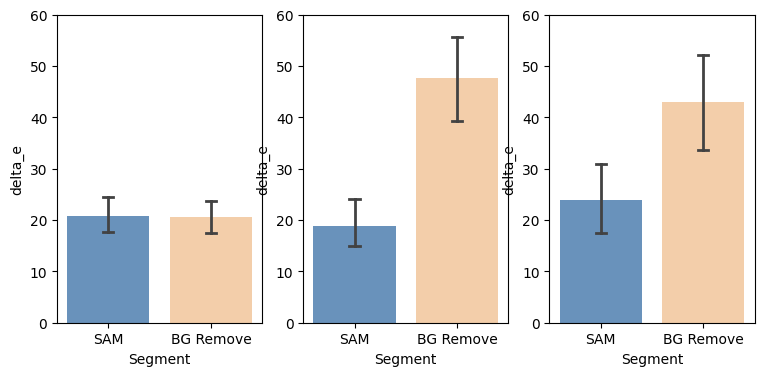

In [37]:
path = "./color_diff.csv"
data = pd.read_csv(path)
print(data.head())
# three subplots
fig, axes = plt.subplots(1, 3, figsize=(9, 4))
palette = ['#5b92c9', '#ffce9e']
# group by segment and type
base_color = data[data['type'] == 'base']
# environment
environment_color= data[data['type'] == 'environment']
# context
context_color= data[data['type'] == 'context']
# base
sns.barplot(x='Segment', y='delta_e', data=base_color, ci=95, ax=axes[0], palette=palette, hue='Segment', errwidth=2, capsize=0.1)
axes[0].set_yticks(np.arange(0, 70, 10))
sns.barplot(x='Segment', y='delta_e', data=environment_color, ci=95, ax=axes[1], palette=palette, hue='Segment', errwidth=2, capsize=0.1)
axes[1].set_yticks(np.arange(0, 70, 10))
sns.barplot(x='Segment', y='delta_e', data=context_color, ci=95, ax=axes[2], palette=palette, hue='Segment', errwidth=2, capsize=0.1)
axes[2].set_yticks(np.arange(0, 70, 10))

# plt.show()
# save to svg
save_path = "./color_diff_segment.svg"
plt.savefig(save_path, format='svg', bbox_inches='tight')
